<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-3/3_KNN_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Lecture 3 - KNN - Iris Dataset

---

*   Sulthan Nauval Abdillah
*   1103213065
*   Link ChatGPT : [link text](https://chat.openai.com/share/af60ab84-347e-4ea3-adaa-79673370e79f)
*   Prompt ChatGPT : "Ingin membuat model KNN dengan dataset iris bagaimana tahapannya?Sertakan visualisasi KNN dan Confusion Matrix-nya!"



# Import Library

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

# Persiapkan Data

In [2]:
# Muat dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model KNN

In [3]:
# Buat model KNN dengan 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model menggunakan data latih
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Visualisai Model

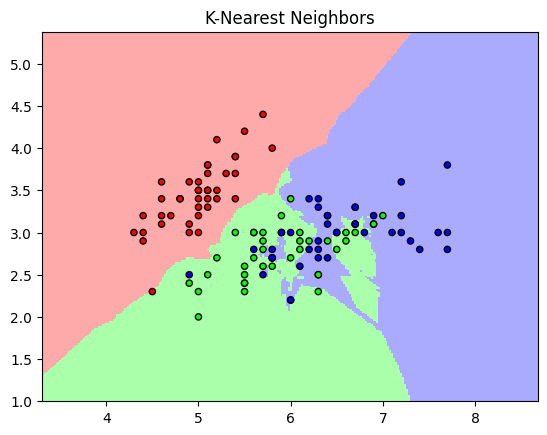

In [4]:
# Fungsi untuk visualisasi pemisah kelas
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("K-Nearest Neighbors")

# Hanya menggunakan 2 fitur untuk visualisasi
X_train_2d = X_train[:, :2]
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)

# Visualisasikan pemisah kelas
plot_decision_boundary(X_train_2d, y_train, knn_2d)
plt.show()

# Evaluasi Model (Confusion Matrix)

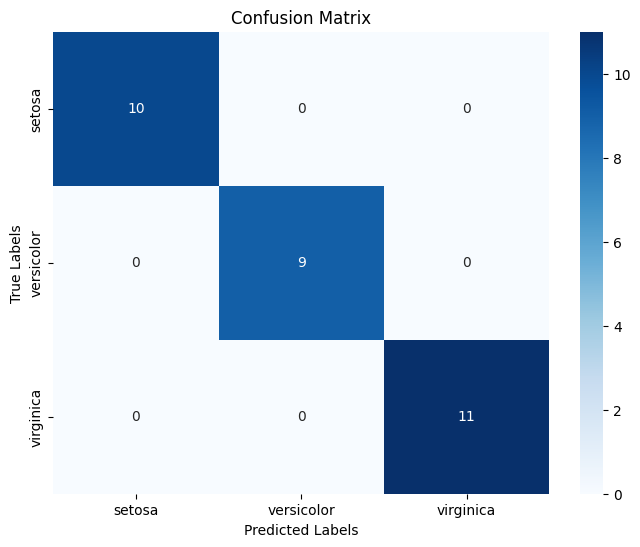

In [5]:
# Lakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()